## 02-09 데이터의 분리(Splitting Data)

### 지도 학습(Supervised Learning)

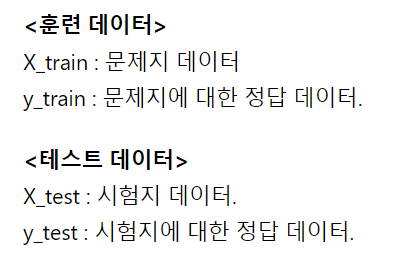

### x와 y 분리하기

1. zip 함수를 이용하여 분리하기  
각 데이터에서 첫번째로 등장한 원소들끼리 묶이고, 두번째로 등장한 원소들끼리 묶인 것을 볼 수 있습니다.

In [1]:
X, y = zip(['a', 1], ['b', 2], ['c', 3])
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


In [4]:
# 리스트의 리스트 또는 행렬 또는 뒤에서 배울 개념인 2D 텐서.
sequences = [['a', 1], ['b', 2], ['c', 3]]
X, y = zip(*sequences)
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


2. 데이터프레임을 이용하여 분리하기

In [10]:
import pandas as pd

values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [11]:
X = df['메일 본문']
y = df['스팸 메일 유무']

In [12]:
print('X 데이터 :',X.to_list())
print('y 데이터 :',y.to_list())

X 데이터 : ['당신에게 드리는 마지막 혜택!', '내일 뵐 수 있을지 확인 부탁드...', '도연씨. 잘 지내시죠? 오랜만입...', '(광고) AI로 주가를 예측할 수 있다!']
y 데이터 : [1, 0, 0, 1]


3. Numpy를 이용하여 분리하기

In [13]:
import numpy as np

np_array = np.arange(0,16).reshape((4,4))
print('전체 데이터 :')
print(np_array)

전체 데이터 :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [14]:
X = np_array[:, :3]
y = np_array[:,3]

print('X 데이터 :')
print(X)
print('y 데이터 :',y)

X 데이터 :
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
y 데이터 : [ 3  7 11 15]


### 테스트 데이터 분리하기

이번에는 이미 X와 y가 분리된 데이터에 대해서 테스트 데이터를 분리하는 과정에 대해서 알아보겠습니다.

1. 사이킷 런을 이용하여 분리하기

train_test_split()은 기본적으로 데이터의 순서를 섞고나서 훈련 데이터와 테스트 데이터를 분리합니다.  

X : 독립 변수 데이터. (배열이나 데이터프레임)  
y : 종속 변수 데이터. 레이블 데이터.  
test_size : 테스트용 데이터 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.  
train_size : 학습용 데이터의 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.  
random_state : 난수 시드

In [23]:
# 임의로 X와 y 데이터를 생성
X, y = np.arange(10).reshape((5, 2)), range(5)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y 전체 데이터 :
[0, 1, 2, 3, 4]


In [24]:
# 7:3의 비율로 훈련 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

In [25]:
print('X 훈련 데이터 :')
print(X_train)
print('X 테스트 데이터 :')
print(X_test)

X 훈련 데이터 :
[[2 3]
 [4 5]
 [6 7]]
X 테스트 데이터 :
[[8 9]
 [0 1]]


In [26]:
print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


2. 수동으로 분리하기

In [27]:
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
X, y = np.arange(0,24).reshape((12,2)), range(12)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
y 전체 데이터 :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [28]:
num_of_train = int(len(X) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다.
num_of_test = int(len(X) - num_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
print('훈련 데이터의 크기 :',num_of_train)
print('테스트 데이터의 크기 :',num_of_test)

훈련 데이터의 크기 : 9
테스트 데이터의 크기 : 3


In [29]:
X_test = X[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
X_train = X[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장

In [30]:
print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
[[18 19]
 [20 21]
 [22 23]]
y 테스트 데이터 :
[9, 10, 11]
